DOMAIN: Automobile

CONTEXT: A brand research company wants to understand which cars or car manufacturers are popular in a certain area of the city or locality. Company has a team which takes pictures of the cars randomly through the day. Using this the company wants to set up an automation which can classify the make of the car once the picture has been given as an input.

TASK: Help to build the image dataset to be used by the AI team to build an image classifier data. Import and display the images in python against their labels. Comment on the challenges faced during this task.

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls

 Acura	'Buick Verano'	 DODGR	 Hyundai      Toyota
 Audi	 Chevrolet	 Ford	 Mitsubishi   Volvo


In [ ]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/Project-CNN/train_auto')
image_count = len(list(data_dir.glob('*/*.*')))
print('Total Training Images:', image_count)

Total Training Images: 15


In [ ]:
#Check how data is organized
!ls -l "/content/drive/MyDrive/Colab Notebooks/Project-CNN/train_auto"

total 40
drwx------ 2 root root 4096 Feb 14 04:47  Acura
drwx------ 2 root root 4096 Feb 14 04:47  Audi
drwx------ 2 root root 4096 Feb 14 04:47 'Buick Verano'
drwx------ 2 root root 4096 Feb 14 04:47  Chevrolet
drwx------ 2 root root 4096 Feb 14 04:47  DODGR
drwx------ 2 root root 4096 Feb 14 04:47  Ford
drwx------ 2 root root 4096 Feb 14 04:47  Hyundai
drwx------ 2 root root 4096 Feb 14 04:47  Mitsubishi
drwx------ 2 root root 4096 Feb 14 04:47  Toyota
drwx------ 2 root root 4096 Feb 14 04:47  Volvo


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/Project-CNN/train_auto/Audi" | head -3

00001.jpg


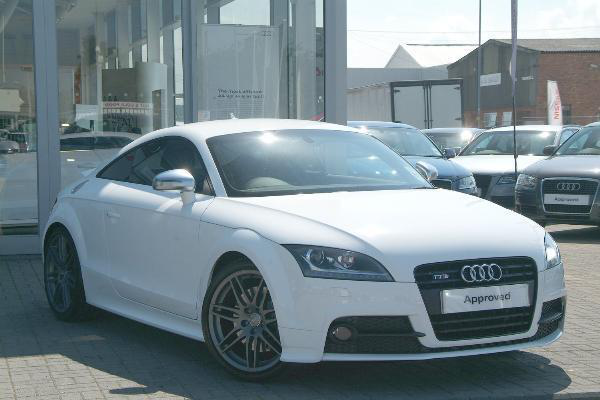

In [ ]:
image_file = '/content/drive/MyDrive/Colab Notebooks/Project-CNN/train_auto/Audi/00001.jpg'
seed_image = tf.keras.preprocessing.image.load_img(image_file)

#Inspect image
seed_image

In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/Project-CNN/train_auto/Volvo" | head -3

00015.jpg


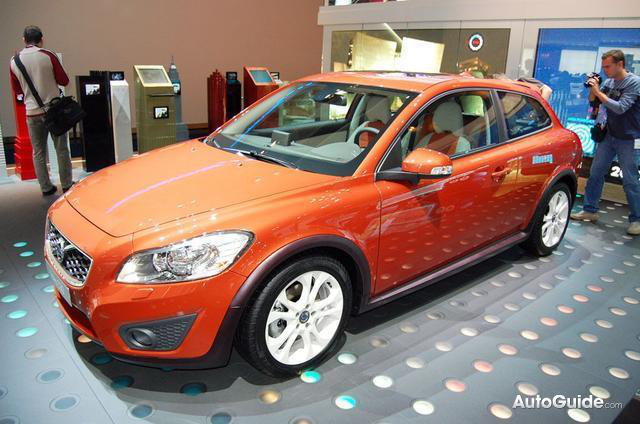

In [ ]:
image_file = '/content/drive/MyDrive/Colab Notebooks/Project-CNN/train_auto/Volvo/00015.jpg'
seed_image = tf.keras.preprocessing.image.load_img(image_file)

#Inspect image
seed_image

In [ ]:
#initialize Train, and Labels for Image classification
trainX = []
categories = []
img_size = 256
img_depth = 3

In [ ]:
# change directory to train_path
os.chdir(data_dir)

In [ ]:
categories = os.listdir(data_dir)
print(categories)

['Ford', 'DODGR', 'Hyundai', 'Buick Verano', 'Volvo', 'Toyota', 'Mitsubishi', 'Audi', 'Acura', 'Chevrolet']


In [ ]:
# Loding images from Train -Auto Classification
import cv2
for i in os.listdir():
  print(i)
  for j in os.listdir(i):
    temp = cv2.imread(str(data_dir) + '/' + i + '/' + j)
    temp = cv2.resize(temp, (img_size, img_size))
    trainimage = np.array(temp).flatten()
    trainX.append([trainimage, i])

Ford
DODGR
Hyundai
Buick Verano
Volvo
Toyota
Mitsubishi
Audi
Acura
Chevrolet


In [ ]:
features = []
labels = []

In [ ]:
for feature, label in trainX:
  features.append(feature)
  labels.append(label)

In [ ]:
features[0]

array([196, 167, 136, ..., 118, 129, 133], dtype=uint8)

Car Make:  Ford


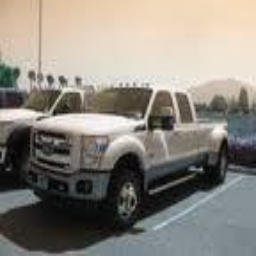

In [ ]:
#Use array_to_img function to convert numpy array to image - Visualizing Train Image
new_image = tf.keras.preprocessing.image.array_to_img(features[0].reshape(img_size,img_size,img_depth))
print('Car Make: ', labels[0])
#Show image
new_image

Challenges Faced: Image brand names were unclear and few happens to have side view with name and brand not clearly visible, it is difficult to classify them manually. This will be the key to work on training the image classification model. Als0, there are many images which is hard to classify due to visibility of the brand, the team to be advised to get photos from the front view rather than the side view which will help in better training on image classification